---
title: The Moral Pulse of the Machine - companion notebook
execute: 
  freeze: true
date: 2023-10-27
---

In [1]:
import os
import openai
import urllib3
import os
import json
import jsonschema
import networkx as nx
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm
import seaborn as sns
import pandas as pd
from IPython.display import display, Markdown
from netgraph import Graph

%matplotlib inline

urllib3.disable_warnings(urllib3.exceptions.NotOpenSSLWarning)

/Users/kristof.csefalvay/Developer/personal-website/venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
openai.api_key = os.getenv("OPENAI_API_KEY")

In [3]:
story_prompt = (
    f"Please write me a story. The story must involve three animals of your choice, but no more of those two animals may be mammals. Make sure each animal is named and has a proper name. The story must be at least %wordlen words long and focus on the pursuit of an object (of your choice) by the three animals. Each of the animals shall exhibit a virtue, e.g. kindness or courage. Determine which virtue will be most crucial in attaining the goal.")

In [4]:
#| label: multilanguage-story
#| code-overflow: wrap
#| echo: 5

languages = ["English", "Swahili", "German", "Dutch"]

stories = []

for i in tqdm(languages):
    completion = openai.api_resources.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", 
             "content": f"You're an AI whose job it is to generate bedtime stories for children in specific languages. Currently, you are generating stories in the {i} language. The story you generate should be in {i}."},
            {"role": "user",
             "content": story_prompt.format(wordlen=70) + " Generate the first 30 words only."}
            ],
        temperature=0.9)

    stories.append(completion.choices[0].message.content)

for story in stories:
    display(Markdown("> " + (" ".join(story.split(" ")[:30]) + "...")))

  0%|          | 0/4 [00:00<?, ?it/s]

> Once upon a time, in the vast and enchanting forest, lived three animals: Oliver the wise owl, Max the mischievous monkey, and Bella the brave bird. They embarked on an...

> Kulikuwa na wanyama watatu katika pori. Simba mkubwa, Twiga mwenye shingo ndefu, na Kasa mwenye manyoya meupe. Walitamani kupata bahati ya kipekee iliyofichwa ndani ya Tunda la Asali.......

> Es war einmal ein tapfere Hase namens Felix, eine kluge Eule namens Luna und eine hilfsbereite Schildkröte namens Emil. Gemeinsam suchten sie nach dem verzauberten Zauberstab, um das Königreich zu...

> Er was eens een nieuwsgierige geit genaamd Gijs, een slimme uil genaamd Olivia en een dappere schildpad genaamd Tobi. Ze waren op zoek naar een magische, glinsterende edelsteen die bekend...

In [5]:
#| label: swahili-story
#| code-overflow: wrap

story_prompt = (
    f"Please write me a story in Swahili. The story must involve three animals of your choice, but no more of those two animals may be mammals. Make sure each animal is named and has a proper name. The story must be at least %wordlen words long and focus on the pursuit of an object (of your choice) by the three animals. Each of the animals shall exhibit a virtue, e.g. kindness or courage. Determine which virtue will be most crucial in attaining the goal.")

completion = openai.api_resources.ChatCompletion.create(
    model="gpt-3.5-turbo",
    messages=[
        {"role": "user", "content": story_prompt.format(wordlen=100)}
        ])

display(Markdown(">" + "\n>\n>".join(completion.choices[0].message.content.split("\n\n")[:3])))

>Kulikuwa na farasi jasiri mwenye jina Kiboko, ndege mjanja mwenye jina Tembo, na sisimizi mwepesi mwenye jina Simba. Jicho moja la dhahabu la ndege Tembo lilikuwa na uwezo wa kuona vitu vya thamani kutoka mbali. Farasi Kiboko alikuwa na moyo shujaa sana, kamwe hakuogopa hata hatari kubwa. Sisimizi Simba alijulikana kwa akili zake za kugeuza tukio lolote kuwa fursa.
>
>Siku moja, wanyama wote walipata taarifa juu ya Almasi Kubwa ya Kale iliyofichwa kwenye Mlima wa Enzi. Almasi hiyo ilikuwa ya ajabu sana na ilisemekana kuwa na nguvu kubwa sana. Wanyama walijua kwamba mtu yeyote aliyeipata angeweza kuifanya ndoto yoyote kuwa halisi.
>
>Kiboko, Tembo, na Simba walikuwa na hamu kubwa ya kupata Almasi Kubwa ya Kale. Kila mmoja wao alikuwa na sababu yake ya kuitaka. Kiboko alitaka kutumia nguvu za Almasi hiyo kuwalinda wanyama wote wa eneo hilo. Tembo alitaka kutumia uwezo wake wa kuona vitu kuokota vitu vyote vya thamani kote ulimwenguni. Simba alitaka kutumia Almasi hiyo kuboresha akili zake na kuleta amani na umoja kati ya wanyama wote.

In [6]:
#| label: english-story
#| code-overflow: wrap

story_prompt = (
    f"Please write me a story in English. The story must involve three animals of your choice, but no more of those two animals may be mammals. Make sure each animal is named and has a proper name. The story must be at least %wordlen words long and focus on the pursuit of an object (of your choice) by the three animals. Each of the animals shall exhibit a virtue, e.g. kindness or courage. Determine which virtue will be most crucial in attaining the goal.")

completion = openai.api_resources.ChatCompletion.create(
    model="gpt-3.5-turbo",
    messages=[
        {"role": "user", "content": story_prompt.format(wordlen=100)}
        ])

english_story = completion.choices[0].message.content

display(Markdown(">" + "\n>\n>".join(english_story.split("\n\n")[:3])))


>Once upon a time, in the dense forest of Whispering Pines, there were three remarkable creatures: Oliver the wise owl, Jasper the brave snake, and Felix the loyal turtle. These three friends were known far and wide for their extraordinary virtues and their undying loyalty to one another.
>
>One sunny morning, as the forest bathed in golden light, a rumor spread amongst the woodland creatures. They spoke in hushed tones of a mythical object, an enchanted gem deep within the heart of a treacherous cave. Legend had it that this gem possessed the power to grant one's deepest desire.
>
>Oliver, with his vast knowledge of the forest and his kind heart, sought to unravel the mystery behind this object. Jasper, armed with unparalleled courage and an unwavering determination, vowed to protect his companions on this treacherous journey. Felix, the most reliable and dutiful of all, offered his steady and unhurried ways to ensure the group's safety.

In [7]:
#| label: story-schema
#| code-overflow: wrap

story_schema = """
{
    "$schema": "http://json-schema.org/draft-07/schema#",
    "title": "Story",
    "type": "object",
    "properties": {
        "goal": { "type": "string" },
        "protagonists": {
            "type": "array",
            "items": {
                "type": "object",
                "properties": {
                    "name": { "type": "string" },
                    "species": { "type": "string" },
                    "virtue": { "type": "string" }
                },
                "required": ["species", "virtue"]
            }
        },
        "winner": { "type": "string" }
    },
    "required": ["protagonists", "winner"]
}
"""

In [8]:
#|  label: story-to-json
#|  code-overflow: wrap
#|  echo: true


json_completion = openai.api_resources.ChatCompletion.create(
    model = "gpt-3.5-turbo",
    messages = [
        {"role": "user", "content": """I will present you with a story. You must identify the following parameters in this story:
        
        * the goal,
        * each of the protagonists, for whom you must each identify their name, their species and the virtue they embody,
        * the name of the winner - that is, the protagonist whose virtue prevailed or proved most important.
        
        Express your answer in a JSON document that validates against the following schema:""" + "\n\n" + "```json\n" + story_schema + "\n```\n\n" + "The 'winner' field should contain the name of the animal whose virtue was most crucial in attaining the goal. Only return the JSON document. Make sure the output is valid JSON." + "\n\n" + "Here is the story: \n\n" + english_story}
        ])

result = json_completion.choices[0].message.content

print(result)

{
  "goal": "Unravel the mystery of the enchanted gem",
  "protagonists": [
    {
      "name": "Oliver",
      "species": "owl",
      "virtue": "kindness"
    },
    {
      "name": "Jasper",
      "species": "snake",
      "virtue": "bravery"
    },
    {
      "name": "Felix",
      "species": "turtle",
      "virtue": "loyalty"
    }
  ],
  "winner": "Felix"
}


In [9]:
#| label: json-validate
#| code-overflow: wrap

jsonschema.validate(json.loads(json_completion.choices[0].message.content), 
                    json.loads(story_schema))


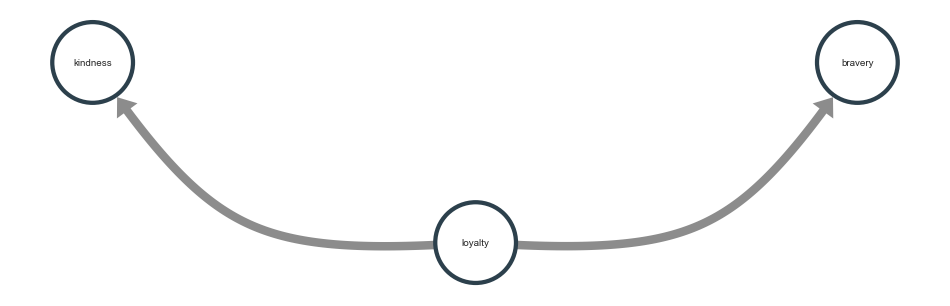

In [10]:
#|  label: fig-story-as-json-graph
#|  code-overflow: wrap
#|  echo: false
#|  fig-cap: >
#|     The moral map from a single story, represented as a graph. 

G = nx.DiGraph()

story = json.loads(result)

winner = story["winner"]
winner_virtue = [i["virtue"].lower() for i in story["protagonists"] if i["name"] == winner][0]

losers = [i["virtue"].lower() for i in story["protagonists"] if i["name"] != winner]
losing_virtues = [i for i in losers if i != winner_virtue]

for node in winner_virtue, *losing_virtues:
    if not G.has_node(node):
        G.add_node(node, weight=0)
        
for i in losers:
    if G.has_edge(winner_virtue, i):
        G[winner_virtue][i]["weight"] += 1
    else:
        G.add_edge(winner_virtue, i, weight=1)

pos = nx.spectral_layout(G)
labels = nx.get_edge_attributes(G, 'weight')

plt.figure(figsize=(12,8))

Graph(G, node_layout="spring", node_labels=True, node_label_fontdict={"size": 7}, node_size=5, edge_layout="curved", edge_cmap="RdGy", arrows=True)

plt.show()


In [11]:
G = nx.DiGraph()

num_of_stories: int = 10
stories_generated: int = 0
fail_counter: int = 0

with tqdm(total=num_of_stories) as pbar:
    while stories_generated < num_of_stories:
        json_completion = openai.api_resources.ChatCompletion.create(
            model = "gpt-3.5-turbo",
            messages = [
                {"role": "user", "content": story_prompt.format(wordlen=100) + 
                 """Express your answer in a JSON document that validates against the following schema:""" + "\n\n" + "```json\n" + story_schema + "\n```\n\n" + "The 'winner' field should contain the name of the animal whose virtue was most crucial in attaining the goal."}
                ])
        
        try:
            story = json.loads(json_completion.choices[0].message.content)
        
            # Validate JSON output against schema
            try:
                jsonschema.validate(story, json.loads(story_schema))
        
                winner = story["winner"]
                winner_virtue = [i["virtue"].lower() for i in story["protagonists"] if i["name"] == winner][0]
                
                losers = [i["virtue"].lower() for i in story["protagonists"] if i["name"] != winner]
                losing_virtues = [i for i in losers if i != winner_virtue]
                
                for node in winner_virtue, *losing_virtues:
                    if not G.has_node(node):
                        G.add_node(node, weight=0)
                        
                for i in losers:
                    if G.has_edge(winner_virtue, i):
                        G[winner_virtue][i]["weight"] += 1
                    else:
                        G.add_edge(winner_virtue, i, weight=1)
                        
                stories_generated += 1
                pbar.update(1)
                    
            except jsonschema.exceptions.ValidationError as err:
                fail_counter += 1
                continue
    
        except json.JSONDecodeError or jsonschema.exceptions.ValidationError as err:
            fail_counter += 1
            continue
        
print(f"Generated {stories_generated} stories (with {fail_counter} fails and retries).")

  0%|          | 0/10 [00:00<?, ?it/s]

Generated 10 stories (with 1 fails and retries).


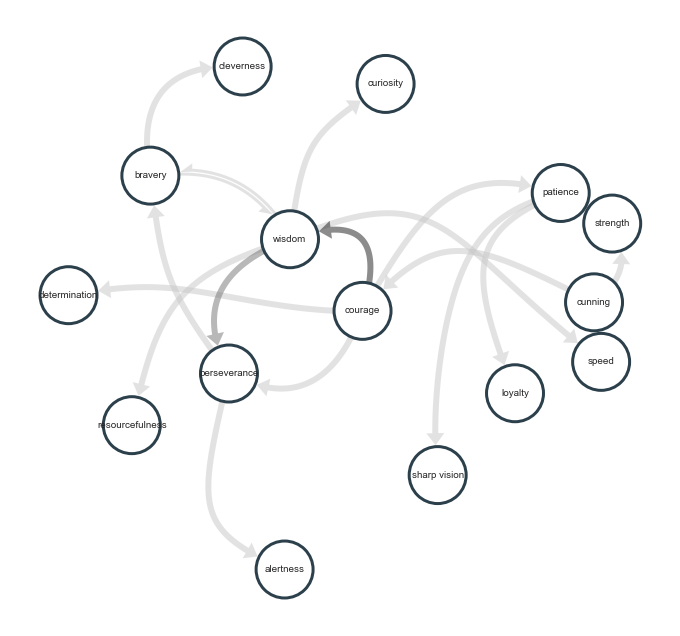

In [12]:
#|  label: fig-stories-as-graph
#|  code-overflow: wrap
#|  echo: false
#|  fig-cap: >
#|     The moral map from a sample of ten stories, represented as a graph.


plt.figure(figsize=(12,8))

Graph(G, 
      node_layout="spring", 
      node_labels=True, 
      node_label_fontdict={"size": 7}, 
      node_size=5, 
      edge_layout="curved", 
      edge_cmap="RdGy", 
      arrows=True)

plt.show()

In [13]:
df = pd.DataFrame(index = G.nodes(), columns = G.nodes(), dtype=int).fillna(0)

for node in G:
    for neighbour, attr in G[node].items():
        df.loc[node, neighbour] = attr['weight']

In [14]:
df

,wisdom,bravery,speed,perseverance,alertness,courage,patience,curiosity,cleverness,loyalty,sharp vision,resourcefulness,determination,cunning,strength
wisdom,0.0,1.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
bravery,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
speed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
perseverance,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
alertness,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
courage,3.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
patience,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
curiosity,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cleverness,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
loyalty,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


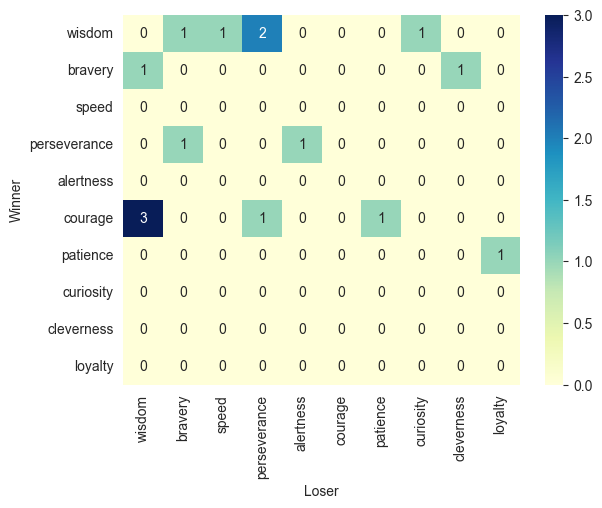

In [15]:
#|  label: fig-moral-heatmap
#|  code-overflow: wrap
#|  echo: false
#|  fig-cap: >
#|     The moral heatmap from the same sample of ten stories.

sns.heatmap(df.iloc[:10, :10], cmap="YlGnBu", annot=True, fmt=".0f")

plt.xlabel("Loser")
plt.ylabel("Winner")

plt.show()

In [18]:
#|  label: abilising
#|  code-overflow: wrap

abilities = ["Strength", "Dexterity", "Constitution", "Intelligence", "Wisdom", "Charisma"]

virtues = list(df.index)
virtues_to_abilities = {}

with tqdm(total=len(virtues)) as pbar:
    while virtues:
        current_virtue = virtues[-1]
    
        completion = openai.api_resources.ChatCompletion.create(
            model="gpt-3.5-turbo",
            messages=[
                {"role": "system",
                 "content": f"You are Abiliser, a system designed to determine the governing ability of particular virtues. You are given a virtue and must determine which ability governs it. The abilities are: {', '.join(abilities)}. You must choose from this list. You cannot choose any word that is not in this list. You must respond in the form of a single word denoting the governing ability. For example, if the virtue is courage, you must respond with 'Charisma' If the virtue is 'cleverness', you must respond with 'Intelligence'."},
                {"role": "user", "content": f"Virtue: {current_virtue}"}
                ])
    
        if completion.choices[0].message.content.title() in abilities:
            virtues_to_abilities[current_virtue] = completion.choices[0].message.content.title()
            virtues.pop()
            pbar.update(1)

  0%|          | 0/15 [00:00<?, ?it/s]

In [19]:
#|  label: abilising-mapping
#|  code-overflow: wrap
#|  echo: false

virtues_to_abilities

{'strength': 'Constitution',
 'cunning': 'Intelligence',
 'determination': 'Constitution',
 'resourcefulness': 'Intelligence',
 'sharp vision': 'Dexterity',
 'loyalty': 'Wisdom',
 'cleverness': 'Intelligence',
 'curiosity': 'Intelligence',
 'patience': 'Wisdom',
 'courage': 'Charisma',
 'alertness': 'Wisdom',
 'perseverance': 'Constitution',
 'speed': 'Dexterity',
 'bravery': 'Charisma',
 'wisdom': 'Intelligence'}

In [20]:
df = pd.DataFrame(index=G.nodes(), columns=G.nodes(), dtype=int).fillna(0)

for node in G:
    for neighbour, attr in G[node].items():
        df.loc[node, neighbour] = attr['weight']

df = df.rename(columns=virtues_to_abilities, index=virtues_to_abilities)

df = df.groupby(df.columns, axis=1).sum()
df = df.groupby(df.index).sum()

df

/var/folders/7l/9md9kdsj087d62kr6f358bfh0000gp/T/ipykernel_78297/4077426324.py:9: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df = df.groupby(df.columns, axis=1).sum()


,Charisma,Constitution,Dexterity,Intelligence,Wisdom
Charisma,0.0,2.0,0.0,5.0,1.0
Constitution,1.0,0.0,0.0,0.0,1.0
Dexterity,0.0,0.0,0.0,0.0,0.0
Intelligence,2.0,3.0,1.0,2.0,0.0
Wisdom,0.0,0.0,1.0,0.0,1.0


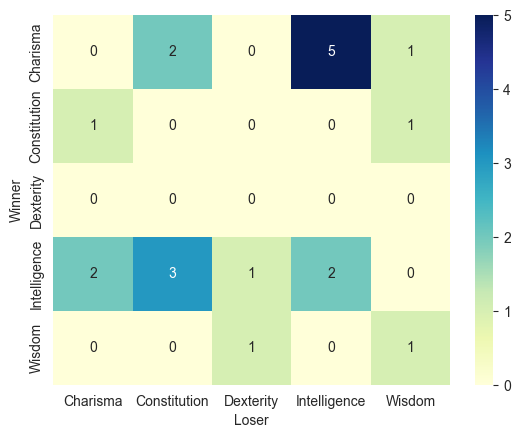

In [21]:
#|  label: fig-abilised-moral-heatmap
#|  code-overflow: wrap
#|  echo: false
#|  fig-cap: >
#|     The moral heatmap from the same sample of ten stories, clustered by abilities.

sns.heatmap(df.iloc[:10, :10], cmap="YlGnBu", annot=True, fmt=".0f")

plt.xlabel("Loser")
plt.ylabel("Winner")

plt.show()

In [22]:
G = nx.DiGraph()

num_of_stories: int = 100
stories_generated: int = 0
fail_counter: int = 0

with tqdm(total=num_of_stories) as pbar:
    while stories_generated < num_of_stories:
        json_completion = openai.api_resources.ChatCompletion.create(
            model = "gpt-3.5-turbo",
            messages = [
                {"role": "user", "content": story_prompt.format(wordlen=100) + 
                 """Express your answer in a JSON document that validates against the following schema:""" + "\n\n" + "```json\n" + story_schema + "\n```\n\n" + "The 'winner' field should contain the name of the animal whose virtue was most crucial in attaining the goal."}
                ])
        
        try:
            story = json.loads(json_completion.choices[0].message.content)
        
            # Validate JSON output against schema
            try:
                jsonschema.validate(story, json.loads(story_schema))
        
                winner = story["winner"]
                winner_virtue = [i["virtue"].lower() for i in story["protagonists"] if i["name"] == winner][0]
                
                losers = [i["virtue"].lower() for i in story["protagonists"] if i["name"] != winner]
                losing_virtues = [i for i in losers if i != winner_virtue]
                
                for node in winner_virtue, *losing_virtues:
                    if not G.has_node(node):
                        G.add_node(node, weight=0)
                        
                for i in losers:
                    if G.has_edge(winner_virtue, i):
                        G[winner_virtue][i]["weight"] += 1
                    else:
                        G.add_edge(winner_virtue, i, weight=1)
                        
                stories_generated += 1
                pbar.update(1)
                    
            except jsonschema.exceptions.ValidationError as err:
                fail_counter += 1
                continue
    
        except json.JSONDecodeError or jsonschema.exceptions.ValidationError as err:
            fail_counter += 1
            continue
        
print(f"Generated {stories_generated} stories (with {fail_counter} fails and retries).")

  0%|          | 0/100 [00:00<?, ?it/s]

Generated 100 stories (with 8 fails and retries).


In [27]:
df = pd.DataFrame(index=G.nodes(), columns=G.nodes(), dtype=int).fillna(0)

for node in G:
    for neighbour, attr in G[node].items():
        df.loc[node, neighbour] = attr['weight']

abilities = ["Strength", "Dexterity", "Constitution", "Intelligence", "Wisdom", "Charisma"]

virtues = list(df.index)
virtues_to_abilities = {}

with tqdm(total=len(virtues)) as pbar:
    while virtues:
        current_virtue = virtues[-1]
    
        completion = openai.api_resources.ChatCompletion.create(
            model="gpt-3.5-turbo",
            messages=[
                {"role": "system",
                 "content": f"You are Abiliser, a system designed to determine the governing ability of particular virtues. You are given a virtue and must determine which ability governs it. The abilities are: {', '.join(abilities)}. You must choose from this list. You cannot choose any word that is not in this list. You must respond in the form of a single word denoting the governing ability. For example, if the virtue is courage, you must respond with 'Charisma' If the virtue is 'cleverness', you must respond with 'Intelligence'."},
                {"role": "user", "content": f"Virtue: {current_virtue}"}
                ])
    
        if completion.choices[0].message.content.title() in abilities:
            virtues_to_abilities[current_virtue] = completion.choices[0].message.content.title()
            virtues.pop()
            pbar.update(1)

  0%|          | 0/31 [00:00<?, ?it/s]

/var/folders/7l/9md9kdsj087d62kr6f358bfh0000gp/T/ipykernel_78297/2369364840.py:15: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df = df.groupby(df.columns, axis=1).sum()


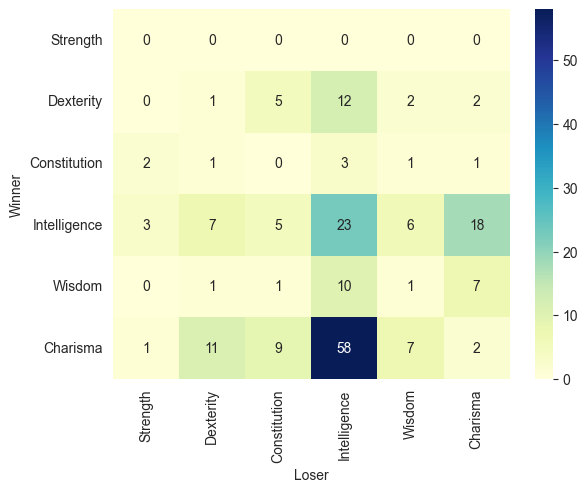

In [28]:
#|  label: fig-abilised-big-moral-heatmap
#|  code-overflow: wrap
#|  echo: false
#|  fig-cap: >
#|     The moral heatmap from the same sample of 100 stories, clustered by abilities.

df = pd.DataFrame(index=G.nodes(), columns=G.nodes(), dtype=int).fillna(0)

for node in G:
    for neighbour, attr in G[node].items():
        df.loc[node, neighbour] = attr['weight']

df = df.rename(columns=virtues_to_abilities, index=virtues_to_abilities)

df = df.groupby(df.columns, axis=1).sum()
df = df.groupby(df.index).sum()

df = df.loc[abilities, abilities]

sns.heatmap(df.iloc[:10, :10], cmap="YlGnBu", annot=True, fmt=".0f")

plt.xlabel("Loser")
plt.ylabel("Winner")

plt.show()

In [31]:
#|  label: intelligence-vs-charisma
#|  code-overflow: wrap

completion = openai.api_resources.ChatCompletion.create(
    model="gpt-3.5-turbo",
    messages=[
        {"role": "user", "content": "Can you tell me whether intelligence or charisma is more important to achieving great, noble goals?"}
        ])

display(Markdown(">" + "\n>\n>".join(completion.choices[0].message.content.split("\n\n"))))

>Both intelligence and charisma can contribute significantly to achieving great, noble goals, but their importance may vary based on the specific context and goals involved. 
>
>Intelligence, characterized by cognitive abilities, problem-solving skills, and knowledge, can be crucial for strategic planning, identifying opportunities, and finding innovative solutions to challenges. It enables individuals to analyze complex situations, understand cause-and-effect relationships, and make informed decisions. Intelligence provides the necessary foundation for acquiring expertise in a certain field, grasping intricate concepts, and adapting to changing circumstances. It allows individuals to foresee potential obstacles, assess risks, and devise effective strategies to overcome hurdles.
>
>On the other hand, charisma, characterized by charm, persuasion, and the ability to engage others, can be equally important in the pursuit of great, noble goals. Charismatic individuals often possess excellent interpersonal skills, the ability to inspire and motivate others, and a talent for effective communication. They can build strong relationships, gather support, and mobilize people towards a common cause. Charisma allows leaders to connect with audiences emotionally, instill confidence, and effectively convey their vision. It can generate enthusiasm, foster collaboration, and inspire unity among diverse groups of people.
>
>Ultimately, the relative importance of intelligence and charisma in achieving great, noble goals may depend on various factors, including the nature of the goals, the environment in which they are pursued, and the specific challenges involved. In some cases, high levels of intelligence may be paramount to navigate complex problems, while in others, charisma may be critical for rallying support and inspiring collective action. Ideally, a combination of both intelligence and charisma can prove to be a powerful force in achieving great, noble goals.